In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st

## Критерий Хи-квадрат для одной случайной величины
Критерий Хи-квадрат (или критерий согласия Пирсона) используется для проверки того, соответствует ли категориальная
случайна величина выбранному распределению. Есть всего два важных условия:
1. Все наблюдения независимы
2. Количество наблюдений в каждой ячейке больше 5

### Пример

Рассмотрим пример с определением того, честная ли у нас игральная кость. Пусть мы сделали 600 бросков игральной
кости и записали в таблице под номером каждой грани количество раз, которое она выпала:


In [2]:
cube = [70, 110, 20, 300, 40, 60]

Чтобы использовать критерий, для начала необходимо сформулировать предположение о честности игральной
кости (гипотезу  ) и выразить его в виде вероятностного распределения. Данное предположение может быть описано
равномерным распределением - то есть таким, где все исходы равновероятны.
Теперь необходимо посчитать, сколько выпадений каждой грани мы ожидаем при справедливости нашего предположения.
Если вероятность получить каждую грань одинакова, то и ожидаем мы в итоге получить одинаковое количество выпадений
каждой грани. То есть:

In [3]:
trusted_cube = [100, 100, 100, 100, 100, 100]

После того как ожидаемое количество выпадений посчитано, мы можем посчитать статистику критерия Хи-квадрат:
       

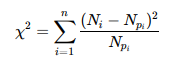

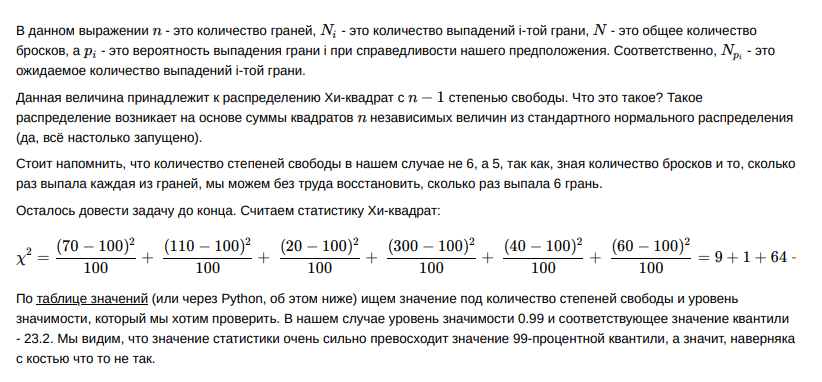

### Либо можно воспользоваться функцией через scipy stats:

In [6]:
stats.chisquare(cube,trusted_cube)

Power_divergenceResult(statistic=526.0, pvalue=1.9468087243178006e-111)

## Критерий Хи-квадрат для двух случайных величин (для двух выборок)

In [8]:
cities = {'city': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Сочи', 'Казань', 'Екатеринбург'], 'ios': [1000, 429, 312, 456, 854, 122], 'android':[1221, 500, 256, 554, 790, 160]} 

In [10]:
city_df = pd.DataFrame(cities)

In [11]:
city_df

,city,ios,android
0,Москва,1000,1221
1,Санкт-Петербург,429,500
2,Новосибирск,312,256
3,Сочи,456,554
4,Казань,854,790
5,Екатеринбург,122,160


Нулевая гипотеза (H0) - категориальное распределение городов для ios и android одинаковое.
Альтернативная - распределение разные городов для ios и android
Уровень значимости - 5%

In [63]:
stats.chisquare(city_df['ios'], city_df['android'])

Power_divergenceResult(statistic=60.07656739780165, pvalue=1.171970789830598e-11)

In [43]:
city_df.loc[0, 'ios'] = 1308

In [44]:
city_df

,city,ios,android
0,Москва,1308,1221
1,Санкт-Петербург,429,500
2,Новосибирск,312,256
3,Сочи,456,554
4,Казань,854,790
5,Екатеринбург,122,160


.





.





### Таблица сопряженности

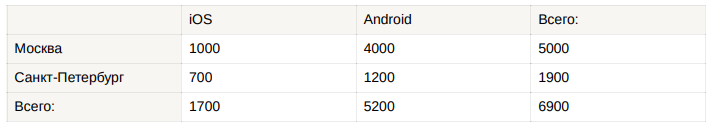

Таблица сопряженности

Доля для IOS: 1700 / 6900 = 0.247
Доля для Android: 5200 / 6900 = 0.753

Москва ios   Android
       1235  3765

Питер  ios   Android
       469.3  1431

In [60]:
5000 * 0.753

3765.0

In [62]:
1900 * 0.753

1430.7

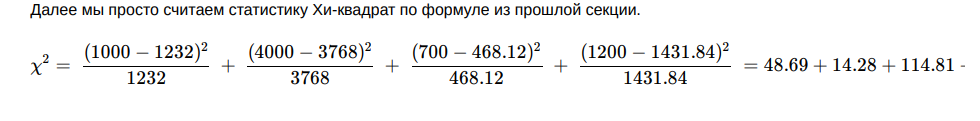

### Линейная регрессия для оценки влияния категориального фактора на метрику

Мы применим подход dummy-переменных, который преобразовывает каждое значение категориальной фичи в отдельную колонку содержащую 0, если в этой строке этой категории нет, и 1, если эта категория присутствует.

Почему же линейная регрессия способна хорошо себя показать?

Для начала распишем, что такое линейная регрессия:

$$
Y = {\alpha} * X + {\beta}
$$

Если подойти чуть строже, то линейная регрессия оценивает математическое ожидание Y, при условии X, т.е:

$$
E[Y | X] = {\alpha} * X + {\beta}
$$


В нашем случае переменная преобразовывается из бинарной в категориальную, т.е. мы получаем оценку матожидания при условии присутствия или отсутствия категории. Т.е. коэффициент перед нашей dummy-переменной мы можем трактовать как прирост к метрике, если у нас "включена" данная категория.

$$
E[Y | X=1] = {\alpha} + {\beta}
$$

$$
E[Y | X=0] = {\beta}
$$


Простой пример, который можно здесь привести - это аналитика влияния промо-акций на метрики, например на средний чек. Промо-акция - это категориальная переменная, которую мы преобразуем в dummy-переменную. Этот пример, кстати, позволит понять, что именно означает коэффициент ${\alpha}$ в модели линейной регрессии, - а он означает прирост к среднему чеку, если на заказе было применено промо. А ${\beta}$ - это просто средний чек по всем заказам без промо.

In [65]:
df_cod = pd.read_csv('C:/Users/makhatyrov_victor/Desktop/курс/one_promo_df.csv')

In [66]:
df_cod

,Unnamed: 0,order_id,order_value,promo_type
0,0,89014417,22,no_promo
1,1,89027235,37,no_promo
2,2,88979766,27,no_promo
3,3,89065392,30,no_promo
4,4,88992397,32,no_promo
...,...,...,...,...
99964,99995,88993434,45,no_promo
99965,99996,89068638,35,no_promo
99966,99997,88980717,40,no_promo
99967,99998,89053781,43,no_promo


In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from statsmodels.regression.linear_model import OLS

In [69]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns

In [70]:
encoder = OneHotEncoder()

In [72]:
encoder.fit_transform(df_cod[['promo_type']])

,promo_type_<SALE15>,promo_type_<no_promo>
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
99964,0.0,1.0
99965,0.0,1.0
99966,0.0,1.0
99967,0.0,1.0


In [74]:
X = encoder.fit_transform(df_cod[['promo_type']]).drop('promo_type_<no_promo>', axis=1).assign(aov=1)

Y = df_cod['order_value']

In [75]:
estimator = OLS(Y, X).fit()

In [76]:
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:            order_value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.166
Date:                Sun, 14 Jul 2024   Prob (F-statistic):              0.280
Time:                        20:52:09   Log-Likelihood:            -3.5255e+05
No. Observations:               99969   AIC:                         7.051e+05
Df Residuals:                   99967   BIC:                         7.051e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
promo_type_<SALE15>    -0.0938    

## Другая задача

In [80]:
df = pd.read_csv('C:/Users/makhatyrov_victor/Desktop/курс/multiple_promo_df.csv')

In [82]:
df.head(5)

,Unnamed: 0,gmv,title,delivery_discount,surge_increment,order_id
0,0,22,SALE15,0,0,768977643
1,1,44,LUCKY,1,0,768977644
2,2,26,SUMMER,0,0,768977645
3,3,26,no_promo,0,0,768977646
4,4,39,no_promo,0,0,768977647


In [83]:
df.query('title == "no_promo"').shape[0] / df.shape[0]

0.5904545516019529

In [84]:
encoder.fit_transform(df[['title']]).head(3)

,title_<LUCKY>,title_<SALE15>,title_<SORRY>,title_<SUMMER>,title_<TAKE30>,title_<WINTER>,title_<no_promo>
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
Y = df['gmv']

X = encoder.fit_transform(df[['title']]).drop('title_<no_promo>', axis=1).assign(aov=1)
X['delivery_discount'] = df['delivery_discount']
X['surge_increment'] = df['surge_increment']

In [86]:
X.head(3)

,title_<LUCKY>,title_<SALE15>,title_<SORRY>,title_<SUMMER>,title_<TAKE30>,title_<WINTER>,aov,delivery_discount,surge_increment
0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0


In [87]:
estimator = OLS(Y, X).fit()

In [88]:
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2844.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:56:48   Log-Likelihood:            -1.3137e+06
No. Observations:              369705   AIC:                         2.627e+06
Df Residuals:                  369696   BIC:                         2.628e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title_<LUCKY>        -4.7214      0.05

# Задачи

## Задача 1
Продолжим работать с данными о влиянии рекламы. Проверьте с использованием метода Хи-квадрат нулевую гипотезу и в ответе запишите значение p-value, округленное до 3-х знаков после запятой.

In [5]:
data = np.array([[21, 16], [75,60], [5,10]])

In [12]:
data

array([[21, 16],
       [75, 60],
       [ 5, 10]])

In [8]:
chi2, p, dof, ex = st.chi2_contingency(data)

0.24365906101675808

In [14]:
p.round(3)

0.244